<a href="https://colab.research.google.com/github/Loga19818eeanvesh/Natural_Language_Processing_Sequence_Models_Assignments/blob/main/tf_c3w2_l2_sarcasm_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
training_size = 20000

In [3]:
# sarcasm.json
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 26.0MB/s]


In [4]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [11]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
vocab_size = len(word_index)+1

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           410208    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 410,641
Trainable params: 410,641
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6638 - accuracy: 0.5882 - val_loss: 0.5765 - val_accuracy: 0.7471 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4273 - accuracy: 0.8400 - val_loss: 0.3852 - val_accuracy: 0.8410 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 3s - loss: 0.2952 - accuracy: 0.8878 - val_loss: 0.3510 - val_accuracy: 0.8548 - 3s/epoch - 4ms/step
Epoch 4/30
625/625 - 3s - loss: 0.2322 - accuracy: 0.9147 - val_loss: 0.3388 - val_accuracy: 0.8596 - 3s/epoch - 4ms/step
Epoch 5/30
625/625 - 3s - loss: 0.1859 - accuracy: 0.9345 - val_loss: 0.3385 - val_accuracy: 0.8585 - 3s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1497 - accuracy: 0.9498 - val_loss: 0.3463 - val_accuracy: 0.8605 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1216 - accuracy: 0.9602 - val_loss: 0.3731 - val_accuracy: 0.8501 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 3s - loss: 0.0979 - accuracy: 0.9709 - val_loss: 0.3785 - val_accuracy: 0.8548 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

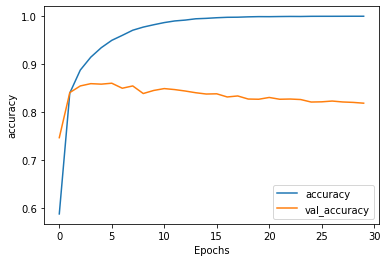

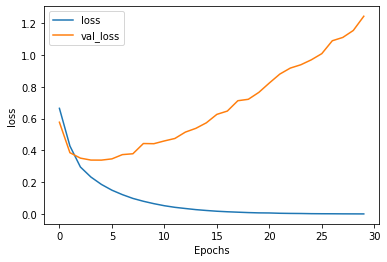

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [18]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights) # shape: (vocab_size, embedding_dim)

[[ 0.00495189  0.01206761 -0.0279063  ...  0.04730662  0.05323131
   0.09378419]
 [-0.02116849  0.0442165  -0.0327787  ...  0.02894128  0.03450615
  -0.00865564]
 [-0.04173834 -0.13268085 -0.18199396 ...  0.11619437 -0.01404537
  -0.02925771]
 ...
 [ 0.2288569   0.22813083  0.15270422 ... -0.1927913   0.14959252
   0.06351419]
 [ 0.27036518  0.27763766  0.21187732 ... -0.18886845  0.24574259
   0.23386267]
 [-0.25475085 -0.20596986 -0.19941653 ...  0.2147571  -0.20647542
  -0.12891427]]


In [19]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[8.211255e-01]
 [8.132237e-05]]
